<a href="https://colab.research.google.com/github/rehammahal/COVID-19-project/blob/main/DataVisual_CasesOfWeek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  del sys.path[0]


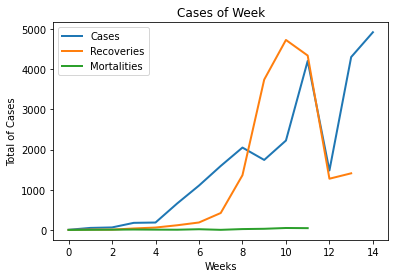

In [12]:
import pandas as pn
import numpy as np
import matplotlib.pyplot as plt

path = "COVID19-project.xlsx"

covidData = pn.read_excel(path, skipfooter = 29597)
covidData = covidData[['Indicator', 'Date', 'region', 'City', 'Cases']]
covidData = covidData.drop(covidData[(covidData.region == "Total")].index)
covidData = covidData.drop(covidData[(covidData.Cases == "?")].index)
covidData["Cases"] = covidData["Cases"].astype('float64')

covidData['Week'] = covidData['Date'].dt.week - 9
covidData_C = covidData.loc[covidData['Indicator'] == 'Cases']
covidData_C = covidData_C[['Week', 'Cases']]
covidData_C = covidData_C.groupby(['Week'], axis = 0, as_index = False).sum()
covidData_R = covidData.loc[covidData['Indicator'] == 'Recoveries']
covidData_R = covidData_R[['Week', 'Cases']]
covidData_R = covidData_R.groupby(['Week'], axis = 0, as_index = False).sum()
covidData_M = covidData.loc[covidData['Indicator'] == 'Mortalities']
covidData_M = covidData_M[['Week', 'Cases']]
covidData_M = covidData_M.groupby(['Week'], axis = 0, as_index = False).sum()
covidData_C['Cases'].plot(kind = 'line', label = 'Cases', linewidth = 2)
covidData_R['Cases'].plot(kind = 'line', label = 'Recoveries', linewidth = 2)
covidData_M['Cases'].plot(kind = 'line', label = 'Mortalities', linewidth = 2)

plt.title('Cases of Week')
plt.ylabel('Total of Cases')
plt.xlabel('Weeks')
plt.legend()